# using geopandas

In [ ]:
!pip install geopandas matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [ ]:
# state and county data
state_county_data = {
  'FL': ["Alachua", "Baker", "Bay", "Bradford", "Brevard", "Broward", "Calhoun",
        "Charlotte", "Citrus", "Clay", "Collier", "Columbia", "DeSoto", "Dixie",
        "Duval", "Escambia", "Flagler", "Franklin", "Gadsden", "Gilchrist",
        "Glades", "Gulf", "Hamilton", "Hardee", "Hendry", "Hernando", "Highlands",
        "Hillsborough", "Holmes", "Indian River", "Jackson", "Jefferson",
        "Lafayette", "Lake", "Lee", "Leon", "Levy", "Liberty", "Madison",
        "Manatee", "Marion", "Martin", "Miami-Dade", "Monroe", "Nassau",
        "Okaloosa", "Okeechobee", "Orange", "Osceola", "Palm Beach", "Pasco",
        "Pinellas", "Polk", "Putnam", "Santa Rosa", "Sarasota", "Seminole",
        "St. Johns", "St. Lucie", "Sumter", "Suwannee", "Taylor", "Union",
        "Volusia", "Wakulla", "Walton", "Washington"],
  # 'GA': ['Appling County', 'Atkinson County', 'Bacon County', 'Baker County',
  #       'Baldwin County', 'Banks County', 'Barrow County', 'Bartow County',
  #       'Ben Hill County', 'Berrien County', 'Bibb County', 'Bleckley County',
  #       'Brantley County', 'Brooks County', 'Bryan County', 'Bulloch County',
  #       'Burke County', 'Butts County', 'Calhoun County', 'Camden County',
  #       'Candler County', 'Carroll County', 'Catoosa County', 'Charlton County',
  #       'Chatham County', 'Chattahoochee County', 'Chattooga County',
  #       'Cherokee County', 'Clarke County', 'Clay County', 'Clayton County',
  #       'Clinch County', 'Cobb County', 'Coffee County', 'Colquitt County',
  #       'Columbia County', 'Cook County', 'Coweta County', 'Crawford County',
  #       'Crisp County', 'Dade County', 'Dawson County', 'Decatur County',
  #       'DeKalb County', 'Dodge County', 'Dooly County', 'Dougherty County',
  #       'Douglas County', 'Early County', 'Echols County', 'Effingham County',
  #       'Elbert County', 'Emanuel County', 'Evans County', 'Fannin County',
  #       'Fayette County', 'Floyd County', 'Forsyth County', 'Franklin County',
  #       'Fulton County', 'Gilmer County', 'Glascock County', 'Glynn County',
  #       'Gordon County', 'Grady County', 'Greene County', 'Gwinnett County',
  #       'Habersham County', 'Hall County', 'Hancock County', 'Haralson County',
  #       'Harris County', 'Hart County', 'Heard County', 'Henry County',
  #       'Houston County', 'Irwin County', 'Jackson County', 'Jasper County',
  #       'Jeff Davis County', 'Jefferson County', 'Jenkins County',
  #       'Johnson County', 'Jones County', 'Lamar County', 'Lanier County',
  #       'Laurens County', 'Lee County', 'Liberty County', 'Lincoln County',
  #       'Long County', 'Lowndes County', 'Lumpkin County', 'Macon County',
  #       'Madison County', 'Marion County', 'McDuffie County', 'McIntosh County',
  #       'Meriwether County', 'Miller County', 'Mitchell County', 'Monroe County',
  #       'Montgomery County', 'Morgan County', 'Murray County', 'Muscogee County',
  #       'Newton County', 'Oconee County', 'Oglethorpe County', 'Paulding County',
  #       'Peach County', 'Pickens County', 'Pierce County', 'Pike County',
  #       'Polk County', 'Pulaski County', 'Putnam County', 'Quitman County',
  #       'Rabun County', 'Randolph County', 'Richmond County', 'Rockdale County',
  #       'Schley County', 'Screven County', 'Seminole County', 'Spalding County',
  #       'Stephens County', 'Stewart County', 'Sumter County', 'Talbot County',
  #       'Taliaferro County', 'Tattnall County', 'Taylor County', 'Telfair County',
  #       'Terrell County', 'Thomas County', 'Tift County', 'Toombs County',
  #       'Towns County', 'Treutlen County', 'Troup County', 'Turner County',
  #       'Twiggs County', 'Union County', 'Upson County', 'Walker County',
  #       'Walton County', 'Ware County', 'Warren County', 'Washington County',
  #       'Wayne County', 'Webster County', 'Wheeler County', 'White County',
  #       'Whitfield County', 'Wilcox County', 'Wilkes County', 'Wilkinson County',
  #       'Worth County'],
  # 'SC': ["Abbeville", "Aiken", "Allendale", "Anderson", "Bamberg", "Barnwell",
  #       "Beaufort", "Berkeley", "Calhoun", "Charleston", "Cherokee", "Chester",
  #       "Chesterfield", "Clarendon", "Colleton", "Darlington", "Dillon",
  #       "Dorchester", "Edgefield", "Fairfield", "Florence", "Georgetown",
  #       "Greenville", "Greenwood", "Hampton", "Horry", "Jasper", "Kershaw",
  #       "Lancaster", "Laurens", "Lee", "Lexington", "McCormick", "Marion",
  #       "Marlboro", "Newberry", "Oconee", "Orangeburg", "Pickens", "Richland",
  #       "Saluda", "Spartanburg", "Sumter", "Union", "Williamsburg", "York"],
  # 'NC': ["Alamance County", "Alexander County", "Alleghany County",
  #       "Anson County", "Ashe County", "Avery County", "Beaufort County",
  #       "Bertie County", "Bladen County", "Brunswick County",
  #       "Buncombe County", "Burke County", "Cabarrus County",
  #       "Caldwell County", "Camden County", "Carteret County",
  #       "Caswell County", "Catawba County", "Chatham County",
  #       "Cherokee County", "Chowan County", "Clay County",
  #       "Cleveland County", "Columbus County", "Craven County",
  #       "Cumberland County", "Currituck County", "Dare County",
  #       "Davidson County", "Davie County", "Duplin County",
  #       "Durham County", "Edgecombe County", "Forsyth County",
  #       "Franklin County", "Gaston County", "Gates County",
  #       "Graham County", "Granville County", "Greene County",
  #       "Guilford County", "Halifax County", "Harnett County",
  #       "Haywood County", "Henderson County", "Hertford County",
  #       "Hoke County", "Hyde County", "Iredell County",
  #       "Jackson County", "Johnston County", "Jones County",
  #       "Lee County", "Lenoir County", "Lincoln County",
  #       "McDowell County", "Macon County", "Madison County",
  #       "Martin County", "Mecklenburg County", "Mitchell County",
  #       "Montgomery County", "Moore County", "Nash County",
  #       "New Hanover County", "Northampton County", "Onslow County",
  #       "Orange County", "Pamlico County", "Pasquotank County",
  #       "Pender County", "Perquimans County", "Person County",
  #       "Pitt County", "Polk County", "Randolph County",
  #       "Richmond County", "Robeson County", "Rockingham County",
  #       "Rowan County", "Rutherford County", "Sampson County",
  #       "Scotland County", "Stanly County", "Stokes County",
  #       "Surry County", "Swain County", "Transylvania County",
  #       "Tyrrell County", "Union County", "Vance County",
  #       "Wake County", "Warren County", "Washington County",
  #       "Watauga County", "Wayne County", "Wilkes County",
  #       "Wilson County", "Yadkin County", "Yancey County"],
  # 'VA': ["Accomack", "Albemarle", "Alleghany", "Amelia", "Amherst", "Appomattox",
  #       "Arlington", "Augusta", "Bath", "Bedford", "Bland", "Botetourt",
  #       "Brunswick", "Buchanan", "Buckingham", "Campbell", "Caroline",
  #       "Carroll", "Charles City", "Charlotte", "Chesterfield", "Clarke",
  #       "Craig", "Culpeper", "Cumberland", "Dickenson", "Dinwiddie", "Essex",
  #       "Fairfax County", "Fauquier", "Floyd", "Fluvanna", "Franklin County",
  #       "Frederick", "Giles", "Gloucester", "Goochland", "Grayson", "Greene",
  #       "Greensville", "Halifax", "Hanover", "Henrico", "Henry", "Highland",
  #       "Isle Of Wight", "James City", "King And Queen", "King George",
  #       "King William", "Lancaster", "Lee", "Loudoun", "Louisa", "Lunenburg",
  #       "Madison", "Mathews", "Mecklenburg", "Middlesex", "Montgomery",
  #       "Nelson", "New Kent", "Northampton", "Northumberland", "Nottoway",
  #       "Orange", "Page", "Patrick", "Pittsylvania", "Powhatan",
  #       "Prince Edward", "Prince George", "Prince William", "Pulaski",
  #       "Rappahannock", "Richmond County", "Roanoke County", "Rockbridge",
  #       "Rockingham", "Russell", "Scott", "Shenandoah", "Smyth",
  #       "Southampton", "Spotsylvania", "Stafford", "Surry", "Sussex",
  #       "Tazewell", "Warren", "Washington", "Westmoreland", "Wise", "Wythe",
  #       "York", "Alexandria", "Bristol", "Buena Vista", "Charlottesville",
  #       "Chesapeake", "Colonial Heights"],
  # 'WV': ["Barbour", "Berkeley", "Boone", "Braxton", "Brooke", "Cabell",
  #       "Calhoun", "Clay", "Doddridge", "Fayette", "Gilmer", "Grant",
  #       "Greenbrier", "Hampshire", "Hancock", "Hardy", "Harrison",
  #       "Jackson", "Jefferson", "Kanawha", "Lewis", "Lincoln", "Logan",
  #       "Marion", "Marshall", "Mason", "McDowell", "Mercer", "Mineral",
  #       "Mingo", "Monongalia", "Monroe", "Morgan", "Nicholas", "Ohio",
  #       "Pendleton", "Pleasants", "Pocahontas", "Preston", "Putnam",
  #       "Raleigh", "Randolph", "Ritchie", "Roane", "Summers", "Taylor",
  #       "Tucker", "Tyler", "Upshur", "Wayne", "Webster", "Wetzel", "Wirt",
  #       "Wood", "Wyoming"],
  # 'DE': ["New Castle", "Kent", "Sussex"],
  # 'MD': ["Allegany", "Anne Arundel", "Baltimore County", "Calvert", "Caroline",
  #       "Carroll", "Cecil", "Charles", "Dorchester", "Frederick", "Garrett",
  #       "Harford", "Howard", "Kent", "Montgomery", "Prince George's",
  #       "Queen Anne's", "St. Mary's", "Somerset", "Talbot", "Washington",
  #       "Wicomico", "Worcester", "Baltimore City"],
  # 'PA': [ "Adams", "Allegheny", "Armstrong", "Beaver", "Bedford", "Berks",
  #         "Blair", "Bradford", "Bucks", "Butler", "Cambria", "Cameron",
  #         "Carbon", "Centre", "Chester", "Clarion", "Clearfield", "Clinton",
  #         "Columbia", "Crawford", "Cumberland", "Dauphin", "Delaware", "Elk",
  #         "Erie", "Fayette", "Forest", "Franklin", "Fulton", "Greene",
  #         "Huntingdon", "Indiana", "Jefferson", "Juniata", "Lackawanna",
  #         "Lancaster", "Lawrence", "Lebanon", "Lehigh", "Luzerne", "Lycoming",
  #         "McKean", "Mercer", "Mifflin", "Monroe", "Montgomery", "Montour",
  #         "Northampton", "Northumberland", "Perry", "Philadelphia", "Pike",
  #         "Potter", "Schuylkill", "Snyder", "Somerset", "Sullivan",
  #         "Susquehanna", "Tioga", "Union", "Venango", "Warren", "Washington",
  #         "Wayne", "Westmoreland", "Wyoming", "York"],
  # 'NJ': ["Atlantic", "Bergen", "Burlington", "Camden", "Cape May", "Cumberland",
  #         "Essex", "Gloucester", "Hudson", "Hunterdon", "Mercer", "Middlesex",
  #         "Monmouth", "Morris", "Ocean", "Passaic", "Salem", "Somerset",
  #         "Sussex", "Union", "Warren"],
  # 'NY': ["Albany", "Allegany", "Bronx", "Broome", "Cattaraugus", "Cayuga",
  #         "Chautauqua", "Chemung", "Chenango", "Clinton", "Columbia", "Cortland",
  #         "Delaware", "Dutchess", "Erie", "Essex", "Franklin", "Fulton",
  #         "Genesee", "Greene", "Hamilton", "Herkimer", "Jefferson", "Kings",
  #         "Lewis", "Livingston", "Madison", "Monroe", "Montgomery", "Nassau",
  #         "New York", "Niagara", "Oneida", "Onondaga", "Ontario", "Orange",
  #         "Orleans", "Oswego", "Otsego", "Putnam", "Queens", "Rensselaer",
  #         "Richmond", "Rockland", "Saratoga", "Schenectady", "Schoharie",
  #         "Schuyler", "Seneca", "St. Lawrence", "Steuben", "Suffolk", "Sullivan",
  #         "Tioga", "Tompkins", "Ulster", "Warren", "Washington", "Wayne",
  #         "Westchester", "Wyoming", "Yates"],
  # 'CT': ["Fairfield", "Hartford", "Litchfield", "Middlesex", "New Haven",
  #        "New London", "Tolland", "Windham"],
  # 'ME': ["Androscoggin", "Aroostook", "Cumberland", "Franklin", "Hancock",
  #         "Kennebec", "Knox", "Lincoln", "Oxford", "Penobscot", "Piscataquis",
  #         "Sagadahoc", "Somerset", "Waldo", "Washington", "York"],
  # 'MA': ["Barnstable", "Berkshire", "Bristol", "Dukes", "Essex",
  #         "Franklin", "Hampden", "Hampshire", "Middlesex", "Nantucket",
  #         "Norfolk", "Plymouth", "Suffolk", "Worcester"],
  # 'RI': ["Bristol", "Kent", "Newport", "Providence", "Washington"],
  # 'NH': ["Belknap", "Carroll", "Cheshire", "Coos", "Grafton",
  #         "Hillsborough", "Merrimack", "Rockingham", "Strafford", "Sullivan"],
  # 'VT': ["Addison", "Bennington", "Caledonia", "Chittenden", "Essex",
  #         "Franklin", "Grand Isle", "Lamoille", "Orange", "Orleans",
  #         "Rutland", "Washington", "Windham", "Windsor"]
}


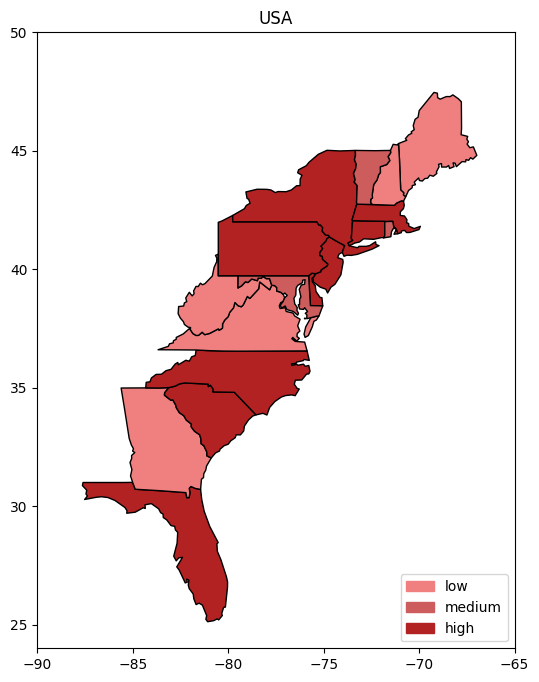

In [ ]:
base_state_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/"

# list of state abbreviations
states = ['FL', 'GA', 'SC', 'NC', 'VA', 'WV', 'DE', 'MD', 'PA', 'NJ', 'NY', 'CT', 'ME', 'MA', 'RI', 'NH', 'VT']

state_data_frames = []

for state in states:  # Loop through states and their counties
    state_data = gpd.GeoDataFrame() #create empty GeoDataFrame
    state_url = f"{base_state_url}{state}.geo.json"
    state_data = gpd.read_file(state_url)
    state_data_frames.append(state_data)  # Add to list of dataframes

# concatenate all state data into one frame
highlighted_states = pd.concat(state_data_frames, ignore_index=True)

color_options = ['lightcoral', 'indianred', 'firebrick']


# generate colors for each state
np.random.seed(42)  # for reproducibility
selected_colors = np.random.choice(color_options, size=len(highlighted_states))

# plot map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
highlighted_states.plot(ax=ax, color=selected_colors, edgecolor='black')
plt.title('USA')

# create legend
categories = ['low', 'medium', 'high']
patches = [mpatches.Patch(color=color_options[i], label=categories[i]) for i in range(len(color_options))]
plt.legend(handles=patches, loc='lower right')

# restrict to east coast
ax.set_xlim(-90, -65)
ax.set_ylim(24, 50)

plt.show()

In [ ]:
base_state_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/"

# list of state abbreviations
states = ['FL', 'GA', 'SC', 'NC', 'VA', 'WV', 'DE', 'MD', 'PA', 'NJ', 'NY', 'CT', 'ME', 'MA', 'RI', 'NH', 'VT']

state_data_frames = []

for state, counties in state_county_data.items():  # Loop through states and their counties
    state_data = gpd.GeoDataFrame() #create empty GeoDataFrame
    for county in counties:  # Loop through the counties in each state

      try:
          county_url = f"{base_state_url}{state}/{county}.geo.json"
          county_data = gpd.read_file(county_url)

          state_data = pd.concat([state_data, county_data], ignore_index = True)

      except Exception as e:
        print(f"Error reading {county_url}: {e}")

    if not state_data.empty:
        state_data_frames.append(state_data)  # Add to list of dataframes
    else:
      print(f"No data found for {state}")


# concatenate all state data into one frame
highlighted_states = pd.concat(state_data_frames, ignore_index=True)

color_options = ['lightcoral', 'indianred', 'firebrick']


# generate colors for each state
np.random.seed(42)  # for reproducibility
selected_colors = np.random.choice(color_options, size=len(highlighted_states))

# plot map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
highlighted_states.plot(ax=ax, color=selected_colors, edgecolor='black')
plt.title('USA')

# create legend
categories = ['low', 'medium', 'high']
patches = [mpatches.Patch(color=color_options[i], label=categories[i]) for i in range(len(color_options))]
plt.legend(handles=patches, loc='lower right')

# restrict to east coast
ax.set_xlim(-90, -65)
ax.set_ylim(24, 50)

plt.show()

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Alachua.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Baker.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Bay.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Bradford.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Brevard.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Broward.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Calhoun.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Charlotte.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Citrus.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Clay.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Collier.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Columbia.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/DeSoto.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Dixie.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Duval.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Escambia.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Flagler.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Franklin.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Gadsden.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Gilchrist.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Glades.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Gulf.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Hamilton.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Hardee.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Hendry.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Hernando.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Highlands.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Hillsborough.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Holmes.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Indian River.geo.json: URL can't contain control characters. '/johan/world.geo.json/master/countries/USA/FL/Indian River.geo.json' (found at least ' ')


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Jackson.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Jefferson.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Lafayette.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Lake.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Lee.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Leon.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Levy.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Liberty.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Madison.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Manatee.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Marion.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Martin.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Miami-Dade.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Monroe.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Nassau.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Okaloosa.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Okeechobee.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Orange.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Osceola.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Palm Beach.geo.json: URL can't contain control characters. '/johan/world.geo.json/master/countries/USA/FL/Palm Beach.geo.json' (found at least ' ')
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Pasco.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Pinellas.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Polk.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Putnam.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Santa Rosa.geo.json: URL can't contain control characters. '/johan/world.geo.json/master/countries/USA/FL/Santa Rosa.geo.json' (found at least ' ')


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Sarasota.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Seminole.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/St. Johns.geo.json: URL can't contain control characters. '/johan/world.geo.json/master/countries/USA/FL/St. Johns.geo.json' (found at least ' ')
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/St. Lucie.geo.json: URL can't contain control characters. '/johan/world.geo.json/master/countries/USA/FL/St. Lucie.geo.json' (found at least ' ')


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Sumter.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Suwannee.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Taylor.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Union.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Volusia.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Wakulla.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Walton.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
Error reading https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/FL/Washington.geo.json: IllegalArgumentException: Points of LinearRing do not form a closed linestring
No data found for FL


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
  return ogr_read(


ValueError: No objects to concatenate

# using altair

In [ ]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [ ]:
usa = data.us_10m.url
unemp = data.unemployment.url

chart = alt.Chart(alt.topo_feature(usa, 'counties')).mark_geoshape(
    stroke='aaa',
    strokeWidth=0.25
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp, 'id', ['rate'])
).encode(
    color=alt.Color('rate:Q',
                    scale=alt.Scale(domain=[0, 0.3], clamp=True),
                    legend=alt.Legend(format='%', title='Bird Density')),
    tooltip=alt.Tooltip('rate:Q', format='.0%')
).project(
    type='albersUsa',
    scale=1700,
    translate=[-250, 350]  # [x dir, y dir]
).properties(
    width=375,
    height=750
).configure_view(
    stroke=None
)

chart


alt.Chart(...)